In [16]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import os
import sklearn
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,optimizers,models
from keras.metrics import AUC
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN Cancer Detection
---

### 1 Introduction

---
#### 1.1 Overview

Diabetes is a metabolical disorder that impacts individual's blood sugar levels. This is often due to the inability to produce or utilize insulin. Dibetes has become quite prevalent in the modern world, given the changes in diets, the prevelance of other diseases, and and many other possible external factors. However, based on known and presumed risks for diabetes, it would be useful to know if these types of risks can be detected to predict whether one is proned to having diabetes or not. To understand this topic further, it is essential to apply unsupervised learning, via clustering models, such as K-Means Clustering and Hierarchical Clustering.


#### 1.2 Goal

As an individual who has predisposition to diabetes via genetics, it is essential to understand the potential risk that may predict diabetes, as well as understand the risks that come from having diabetes. By being able to group and identify those proned to diabetes, based on potential diabetes risks, it will enable for better awareness and long term preventative care. To approach this problem, it is essential to evaluate different clustering approaches, to determine what model would best predict diabetes, given the presence of certain factors. The main clustering approaches that will be investigated in this will be Hierarchical Clustering via Agglomerative Clustering and K-Means Clustering.

#### 1.3 About the Data

**1.3.1 Load The Data (Train Data)**

In [17]:
# acquire the train data
train = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/train_labels.csv")

# print out top 5 data sets from diabetes
train.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


**1.3.2 Load The Data (Test Data)**

In [19]:
test = pd.read_csv("/kaggle/input/histopathologic-cancer-detection/sample_submission.csv")
# print out top 5 data sets from diabetes
test.head()

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0
1,95596b92e5066c5c52466c90b69ff089b39f2737,0
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0
3,2c35657e312966e9294eac6841726ff3a748febf,0
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0


**1.3.2 Data Source and Citation**

**_Citation:_**
Will Cukierski. (2018). Histopathologic Cancer Detection. Kaggle. https://kaggle.com/competitions/histopathologic-cancer-detection

The dataset that was used is called the Histopathologic Cancer Detection from Kaggle. It can be found [here](https://kaggle.com/competitions/histopathologic-cancer-detection) page, which is cited in the link above. In this data, it provides pathology images of tumors. 

**1.3.3 Data Description**

This data overall provides images in which tumors are identified as either:
- **Positive = 1:** When a 32 x 32 pixel sized tumor is detected
- **Negative = 0:** When a 32 x 32 pixel sized tumor is not detected

This data consists of is 220025 rows and 2 columns. Here are all the features of this data and what they are:

- **id**: The file name for the image.
- **label**: The classification of the image (positive = 1; negative = 0)

This data will be used to help deep learn the identification of a tumor.


### 2 Data Cleaning

--- 
#### 2.1 Data Exploration

The first part of the exploratory data analysis, is to determine what kind of data is being used in this investigation. It is also important to evaluate any important parts of the data that may need to be processed. For this first part, understanding what the data has and whether there are null values should be evaluated. 

**2.1.1: Types of Usable Data**

In [20]:
# print information on the datasets
print("Diabetes Information")
print(train.info(), "\n")

Diabetes Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None 



In [21]:
# print number sum of null values present in each column
print("Diabetes Information: Null Values")
print(train.isnull().sum(), "\n")

Diabetes Information: Null Values
id       0
label    0
dtype: int64 



**2.1.2: Understand the Distribution of Data Points**




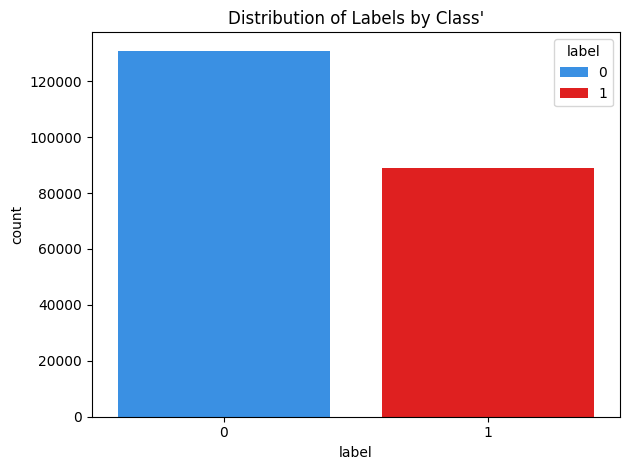

In [22]:
# create count plot to demonstrate structure of the image train dataset
labels = "label"

# use sns to plot count plot
sns.countplot(x = labels, hue = labels, 
              data = train, 
              palette = ["dodgerblue", "r"],
              dodge = False) # center the bars
plt.title(f"Distribution of Labels by Class'")
plt.tight_layout()
plt.show()

**Observations:** There are more Non-Tumor images than Tumor Images. This evident because there are visually about 90000 images for ones with tumors and about +13000 for non-tumor images.

### 2.2 Visualize Train Data Images
**2.2.1: Display Taining Data Images for Further Investigation**

Given that the data is being analyzed as images, it would be informational to be able to display and utilize each image as needed. This will allow for deep learning to occur. Here is the images provided by the train dataset.

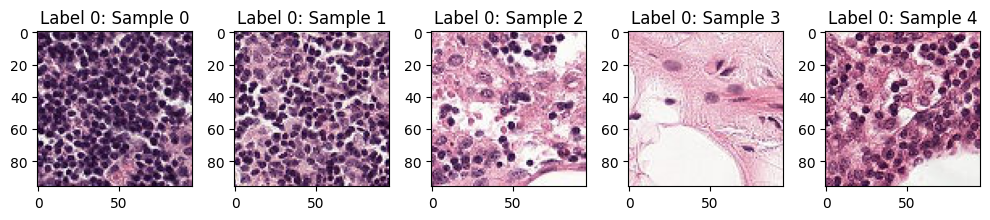

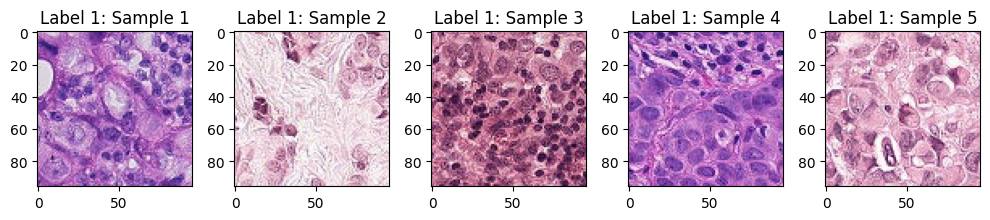

In [23]:
train_path = "/kaggle/input/histopathologic-cancer-detection/train"

# for each input of "id" in train, add tif to specify image type
train["path"] = train["id"].apply(lambda x: os.path.join(train_path, 
                                                         str(x) + ".tif"))

# sample size
n_images = 5

# randomly acquire labels with 0 and 1; pick 5 images
label_0 = train[train["label"] == 0].sample(n_images) 
label_1 = train[train["label"] == 1].sample(n_images)

# plot images for label 0
plt.figure(figsize=(10, 4))

# iterate through each image 
for i in range(n_images):
    # seek image from directory
    image_path = label_0["path"].iloc[i]
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # display image
    plt.subplot(2, n_images, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis
    plt.title(f"Label 0: Sample {i+1}")
    
plt.tight_layout()
plt.show()
    
    
# plot images for label 1
plt.figure(figsize=(10, 4))

# iterate through each image 
for i in range(n_images):
    # seek image from directory
    image_path = label_1["path"].iloc[i]
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    # display image
    plt.subplot(2, n_images, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis
    plt.title(f"Label 1: Sample {i + 1}")
    
plt.tight_layout()
plt.show()

**2.2.2: Display Testing Data Images for Further Investigation**

To see what the test data provides, visualizing the test data is just as important.

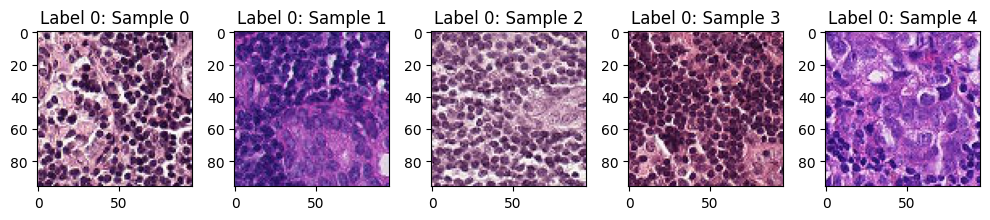

In [25]:
test_path = "/kaggle/input/histopathologic-cancer-detection/test"

# for each input of "id" in train, add tif to specify image type
test["path"] = test["id"].apply(lambda x: os.path.join(test_path,
                                                       str(x) + ".tif"))

# sample size
n_images = 5

# randomly acquire labels with 0 and 1; pick 5 images
label_0_t = test[test["label"] == 0].sample(n_images)

# plot images for label 2
plt.figure(figsize=(10, 4))

# iterate through each image 
for i in range(n_images):
    image_path = label_0_t["path"].iloc[i]
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    # display image
    plt.subplot(2, n_images, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis
    plt.title(f"Label 0: Sample {i+1}")
    
plt.tight_layout()
plt.show()

### 2.3 Simplifying Data

**2.3.1: Sample Train Data**
Given there are a lot of rows for train data, especially given from the count plot before, it is essnetial to consider donw-sizing the data to model, since it might take a long time for the epochs to run if it is too long.

In [44]:
# print number of columns
print("Number of Columns For Train Data:", 
      len(train.columns))

#print number of rows
print("Number of Rows For Train Data:", 
      len(train))

Number of Columns For Train Data: 3
Number of Rows For Train Data: 220025


**Obsevations:** There are 220025 rows of data. This will require a lot of time to learn from.

To best utilize the data in a faster amount of time, it would be best to sample the data. I will be using 10%.

In [24]:
# large data, sample 10%
sample_size = int(0.1 * len(train))

# sample the dataset
tn_samp = train.sample(n = sample_size, 
                       random_state = 30)

# reset the index of the df
tn_samp.reset_index(drop = True, 
                    inplace = True)
# display table of sampled data
tn_samp

,id,label,path
0,bf043281d5503901a98dd5e33e9435cfef71459b,0,/kaggle/input/histopathologic-cancer-detection...
1,02c0bf12a29ce17a1fa22d4089f48555ca66f702,1,/kaggle/input/histopathologic-cancer-detection...
2,487b0ac36605a42dd85bdac62733fc17872ae4b6,0,/kaggle/input/histopathologic-cancer-detection...
3,e2b13342993a974aaa41cd5029c083bac77e38a5,1,/kaggle/input/histopathologic-cancer-detection...
4,48ae48faa3ce3e7aa25f868c8a3b711dedca28e8,0,/kaggle/input/histopathologic-cancer-detection...
...,...,...,...
21997,3b4888fcac696e1e8171a11a7062347110446553,0,/kaggle/input/histopathologic-cancer-detection...
21998,6c1ea9485840a76505556f71ce32487713553f6b,1,/kaggle/input/histopathologic-cancer-detection...
21999,207f6adde8202d957b71ce57d75f19f09e997cac,1,/kaggle/input/histopathologic-cancer-detection...
22000,da4b89cc76d3b1790863cb78843ef6326c63a0f7,0,/kaggle/input/histopathologic-cancer-detection...


### 3 Data Pre-Processing 

---

#### 3.1 Image Data Augmentation and Scaling 
To prevent overfitting, it is useful to utilize artificially developed image data from the train data, validation data, and test data.

The first things that need to be done are: define the image generators for augmentation, make sure the data can run through the generator, then generate the data.

**3.3.1: Augmentation of Data**

The `ImageDataGenerator` is the generater that will be used to create fake images for training and validation.

In [50]:
# create augmented data for training 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# create augmented data for validation
valid_datagen = ImageDataGenerator(rescale=1./255)

# create augmented data for test
test_datagen = ImageDataGenerator(rescale=1./255)

**3.3.2: Convert Train Data Into Train and Validation Data**

To make sure a model works correctly, validation and train data need to be made by splitting the original train data. The test size for validation should be 20% of the data

In [53]:
# define the paths in which the images are stored in
train_path = "/kaggle/input/histopathologic-cancer-detection/train"
test_path = "/kaggle/input/histopathologic-cancer-detection/test"

# split train data into train and validation sets
train_df, valid_df = train_test_split(tn_samp, 
                                      test_size = 0.2, 
                                      random_state = 42)

# convert the "label" column to string format
train_df["label"] = train_df["label"].astype(str)
valid_df["label"] = valid_df["label"].astype(str)

# add .tif at the end of each id to allow for the generator to pull the image
train_df["id"] += ".tif"
valid_df["id"] += ".tif"

# do the same process for test dataset
test_df = test.copy()
test_df["id"] += ".tif"

In [54]:
# set up the generators to creat the images
# set up for train generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    directory = train_path,
    x_col="id",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# set up validation generator
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory=train_path,  # Note: Change this to test_path if validation images are in the test directory
    x_col="id",
    y_col="label",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# set up test generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe= test_df,
    directory= test_path,  # Note: Change this to test_path if validation images are in the test directory
    x_col = "id",
    y_col = None,
    target_size = (128, 128),
    batch_size = 32,
    class_mode = None,
    shuffle = False
)

Found 17601 validated image filenames belonging to 2 classes.
Found 4401 validated image filenames belonging to 2 classes.
Found 57458 validated image filenames.


### 4 Model Architecture

---

#### 4.1 Build The CNN Model
The neural network architecture needs to be identified before learning. The reason is it is the structure in which the deep learning will occur. Withough model architecture, the ability to learn is non-existent. The one that will be used is Sequential because it is a CNN that is useful for deep learning from images. In this case, images are the input data.


In [55]:
#  using tf.keras.Sequential to build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 5 Model Analysis

---

#### 5.1 Training and Validation

**5.1 Compile, Train and Validate The Model** 

Compiling is used to ensure optimization whenever errors are faced throughout the learning process. In result, this must be implemented before the learning process can begin. The things to accomodate for are optimization appraoch, loss function, and evaluation metrics. The one selected in this model are:
- `adam`: Picked due to it's balance of both AdaGrad and RMS Prop
- `binary_crossentropy`: Picked due to the use of binary categories of 0 and 1 (No Tumor and Tumor)
- `accuracy`: Picked because it ensures whether the model can predict well or not, compared to original labels.

In [64]:
# compile the model
model.compile(optimizer = "adam", 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])

# train the model, this will provide the history of the data
history = model.fit(train_generator, 
                    validation_data = valid_generator, 
                    epochs = 15)

Epoch 1/15
  1/551 ━━━━━━━━━━━━━━━━━━━━ 59:33 6s/step - accuracy: 0.7500 - loss: 0.5491

W0000 00:00:1714684057.770970     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


550/551 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8402 - loss: 0.3734

W0000 00:00:1714684165.729518     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


551/551 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.8402 - loss: 0.3734 - val_accuracy: 0.8532 - val_loss: 0.3372
Epoch 2/15


W0000 00:00:1714684174.189200     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


551/551 ━━━━━━━━━━━━━━━━━━━━ 112s 201ms/step - accuracy: 0.8445 - loss: 0.3654 - val_accuracy: 0.8416 - val_loss: 0.3528
Epoch 3/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 109s 196ms/step - accuracy: 0.8450 - loss: 0.3675 - val_accuracy: 0.8607 - val_loss: 0.3297
Epoch 4/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 111s 198ms/step - accuracy: 0.8380 - loss: 0.3714 - val_accuracy: 0.8596 - val_loss: 0.3318
Epoch 5/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 110s 198ms/step - accuracy: 0.8445 - loss: 0.3548 - val_accuracy: 0.8491 - val_loss: 0.3554
Epoch 6/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 111s 200ms/step - accuracy: 0.8500 - loss: 0.3463 - val_accuracy: 0.8596 - val_loss: 0.3209
Epoch 7/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 113s 203ms/step - accuracy: 0.8551 - loss: 0.3393 - val_accuracy: 0.8505 - val_loss: 0.3394
Epoch 8/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 114s 205ms/step - accuracy: 0.8507 - loss: 0.3464 - val_accuracy: 0.8125 - val_loss: 0.4107
Epoch 9/15
551/551 ━━━━━━━━━━━━━━━━━━━━ 113s 203ms/step - accuracy: 0.8512 - loss: 0.33

#### 5.2 Predict the Model

**5.2.1: Predictions** 

In [65]:
# predictions on test set
predictions = model.predict(test_generator)
predictions

1796/1796 ━━━━━━━━━━━━━━━━━━━━ 151s 84ms/step


array([[0.02142707],
       [0.08074455],
       [0.04526515],
       ...,
       [0.00963932],
       [0.02165115],
       [0.16288142]], dtype=float32)

**5.2.2 Store Prediction Output As Dataframe in .csv**

This step is to store the data for Kaggle Submission.

In [66]:
# create a csv storing the results of the prediction for score
# make the predictions into a list
preds_list = predictions.flatten().tolist()

# create a new DataFrame with 'id' column from test_df
submission = pd.DataFrame(test["id"])

# assign the predictions to respective id's
submission["label"] = preds_list

# convert the "label" as a numerical value again
submission["label"] = submission["label"].astype(float)

# save df as .csv
submission.to_csv("submission.csv", 
                     index=False)

# display the 5 rows to make sure it is correct
submission.head()

,id,label
0,0b2ea2a822ad23fdb1b5dd26653da899fbd2c0d5,0.021427
1,95596b92e5066c5c52466c90b69ff089b39f2737,0.080745
2,248e6738860e2ebcf6258cdc1f32f299e0c76914,0.045265
3,2c35657e312966e9294eac6841726ff3a748febf,0.066669
4,145782eb7caa1c516acbe2eda34d9a3f31c41fd6,0.047766


**5.2.3 Kaggle Results**

*With 6 Epochs*

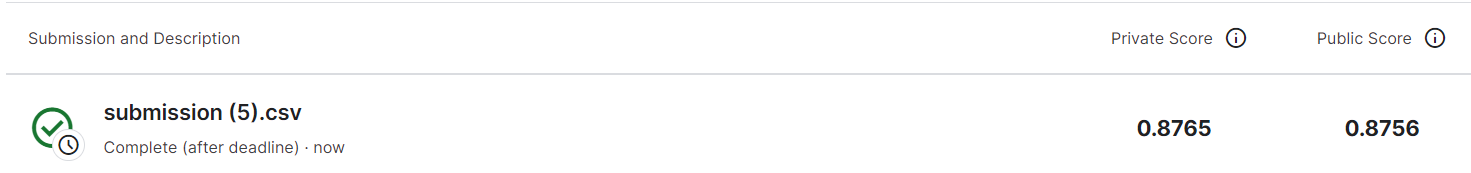

*With 15 Epochs*

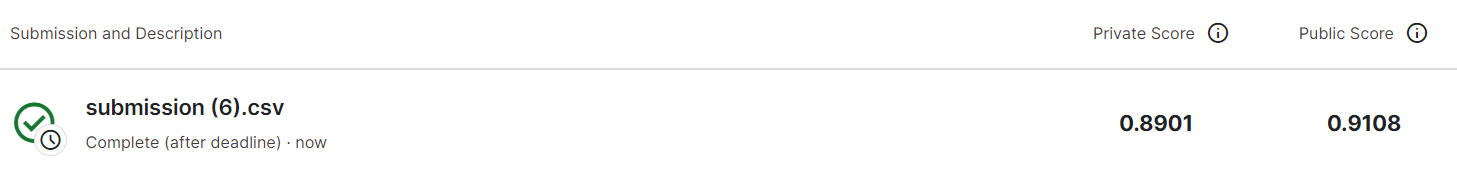

### 5.3 Traning and Validation Visualizations

**5.3.1 Training and Validation Accuracy Plot**

Let's check to make sure the model's accuracy increases as it should.

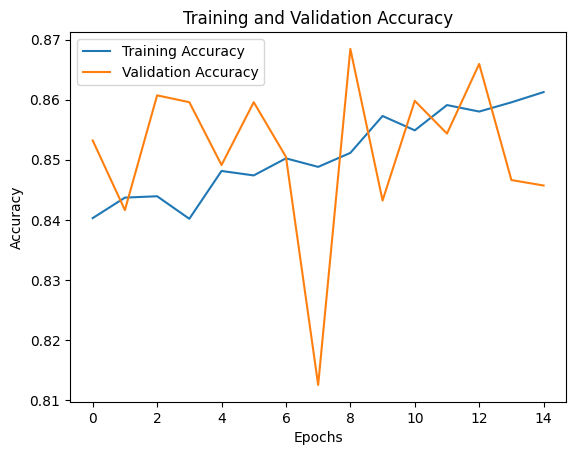

In [67]:
# plot training and validation accuracy
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**5.3.2 Training and Validation Loss Plot**

Let's check to make sure the model's loss is decreasing over time or not.

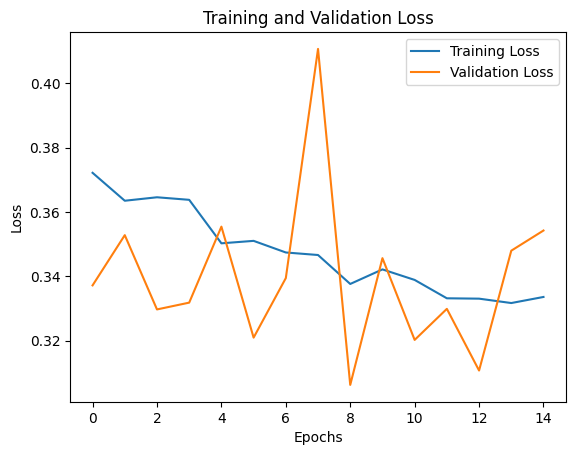

In [68]:
# lot training and validation loss
plt.plot(history.history["loss"], 
         label = "Training Loss")
plt.plot(history.history["val_loss"], 
         label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**5.3.3 Images of Predictions**

Let's check to make sure the model's loss is decreasing over time or not.

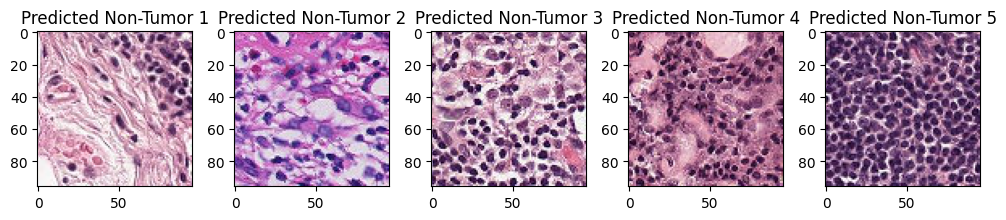

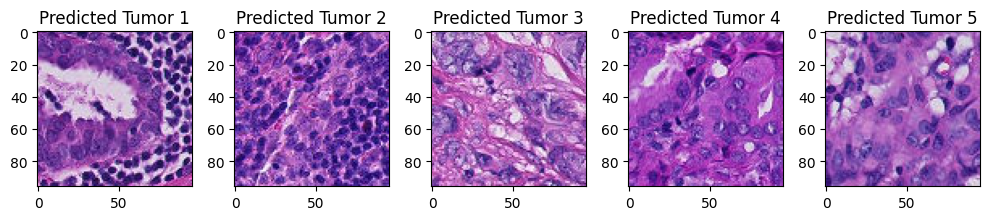

In [72]:
submission["path"] = submission["id"].apply(lambda x: os.path.join(test_path, 
                                                         str(x) + ".tif"))


# sample size
n_images = 5

# randomly acquire labels with 0 and 1; pick 5 images
label_0_pred = submission[submission["label"] < 0.5].sample(n_images) 
label_1_pred = submission[submission["label"] >= 0.5].sample(n_images)

# plot images for label 0
plt.figure(figsize=(10, 4))

# iterate through each image 
for i in range(n_images):
    # seek image from directory
    image_path = label_0_pred["path"].iloc[i]
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # display image
    plt.subplot(2, n_images, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis
    plt.title(f"Predicted Non-Tumor {i+1}")
    
plt.tight_layout()
plt.show()

# plot images for label 1
plt.figure(figsize=(10, 4))

# iterate through each image 
for i in range(n_images):
    # seek image from directory
    image_path = label_1_pred["path"].iloc[i]
    image = tf.keras.preprocessing.image.load_img(image_path)
    image = tf.keras.preprocessing.image.img_to_array(image)
    
    # display image
    plt.subplot(2, n_images, i+1)
    plt.imshow(image.astype(np.uint8))
    plt.axis
    plt.title(f"Predicted Tumor {i+1}")
    
plt.tight_layout()
plt.show()
    

### 6 Results

#### 6.1 Overview of Results

After creating a model, it was evident that through the epochs, the accuracy value kept increasing, while the loss value kept decreasing for the training data. The accuracy value for the training data went from 0.75 to 0.8619, while the loss value went from 0.5491 to 0.3312. As for the validation, the accuracy slightly increased from 0.8456 to 0.8417, while the loss value also increased slightly from 0.3528 to 0.3542. Given this information, it is evident that there was somewhat of a trend for validation but not so much for loss. 

After testing the kaggle values, utilizing values from both epochs 6 and 15, it is evident that the model improved in score, as the epochs increased.

As for the graphs, with further investigation, it is evident there is a lot of fluxuations for the data through each epoch. This indicates that the data might actually be overfitted to the training data, which might cause it to capture noise from the training data. 

Lastly, from the looks of the final predictions, it looks like the model was able to distinguish the model by color, but somewhat fails to distinguish a tumor over a non-tumor, especially for predicted non-tumor 2, non-turmor 4, and tumor 2. There is some sort of misclassifications, but the progress shows potential.

#### 6.2 Discussion
Given the results portrayed in the project, it evident that the Sequential CNN Model Architecture was able to predict tumor pictures from non-tumor pictures to an extent. However, due to the trends being inconsistent for the validiation and training accuracies and loss, it is evident there is possibly overfitting, a lot of noise, and/or lack of optimization. Although this model is still capable of predicting somewhat accurately, the validation and training plots inidcate that the model needs improvement some aspects. One thing to consider though is when the epochs increased, the score recieved from Kaggle was a lot higher. This means epoch is a possible solution out of many that can fix this model.

#### 6.3 Things to Improve
As mentioned in the discussion, there is an increase of a better model when the epoch increases, meaning increasing  the epoch for this model can improve the model. Furthermore, given that the training and validation plot struggled to provided a smooth validation accuracy and los trend, it is evident that optimization was not the best. A solution to that for the future is to assign a differnt optimization approach or maybe using more training data values. Since the training values were sampled, it did not best reflect the potential data values necessary to help the model. Therefore, another approach to improve this model is use a larger sample of training data.  Another way to improve the model is maybe specify the pixels next time or adjust more of the hyperparameters that were not explored in this project. In result, making adjustments to the traning data sample, model, optimization, and epoch are potential solutions to improving this model.

### 7 Closing

#### 7.1 Conclusion
Overall, based on the model analysis, this model was able to somewhat predict whether an image had a tumor or not. However, there is a need for improvement since the analysis also indicated fluctuations in the validation and training accuracy and loss plots. In result the model needs to be improved via means of increasing test data, adjusting hyperparameters, adjusting the model, and increasing the epochs.

#### 7.2 Sources
**7.2.1: Citations**

Will Cukierski. (2018). Histopathologic Cancer Detection. Kaggle. https://kaggle.com/competitions/histopathologic-cancer-detection

The dataset that was used is called the Histopathologic Cancer Detection from Kaggle. It can be found [here](https://kaggle.com/competitions/histopathologic-cancer-detection) page, which is cited in the link above. In this data, it provides pathology images of tumors. 

#### 7.3 Github 
**Github Link** | 